<a href="https://colab.research.google.com/github/EmiljaB/Mushroom-Classification/blob/PCA/Mushroom_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation matrix
### Calculating the correlation between features
## Experiments:
### - Exclude features with highest correlation
### - Only consider features with highest correlation

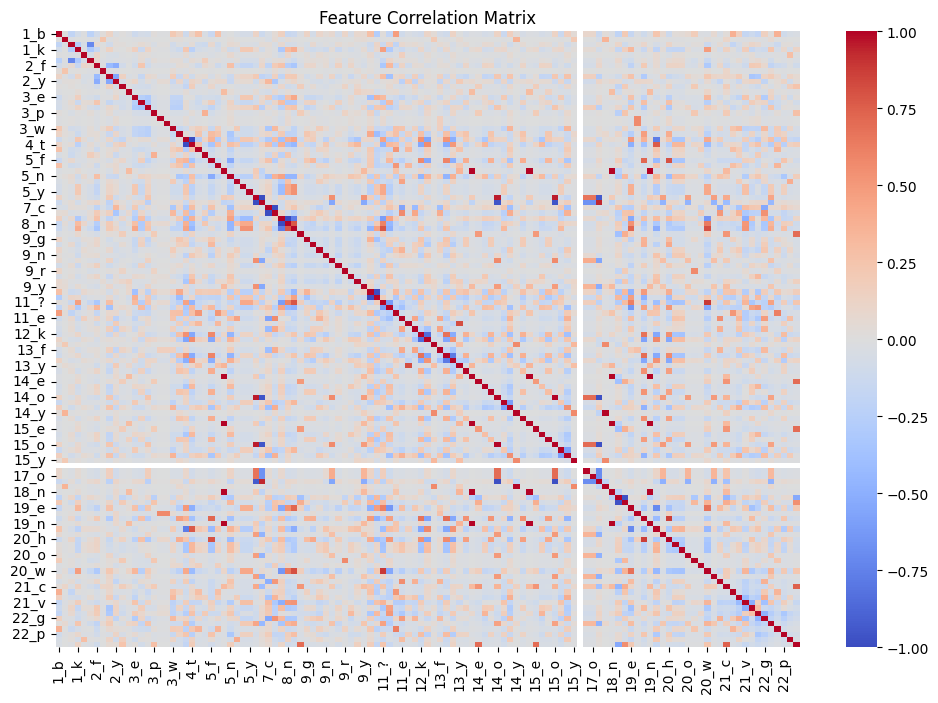

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the mushroom dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

# Split features and target
x = data.iloc[:, 1:]  # Exclude the target column (first column)
y = data.iloc[:, 0]

# Apply one hot encoding to convert categorical data to numeric
x_encoded = pd.get_dummies(x)

# Calculate the correlation matrix
correlation_matrix = x_encoded.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


# Experiment: Removing features with highest correlation with the target

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the mushroom dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

# Split features (all columns except the first) and target (first column)
x = data.iloc[:, 1:]  # All columns except the first (target)
y = data.iloc[:, 0]   # First column is the target

# Encode the categorical target column (first column)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply one hot encoding to convert categorical data to numeric for features
x_encoded = pd.get_dummies(x)

# Create a DataFrame to hold the encoded features
# Add the target as a column for correlation calculation
x_encoded['target'] = y_encoded  # Add the encoded target to the features

# Calculate the correlation of all features with the target
correlation_with_target = x_encoded.corr()['target'].drop('target')  # Drop target self-correlation

# Display correlation values
print("Correlation of features with the target:\n", correlation_with_target)

# Identify the feature with the highest absolute correlation
highest_correlation_feature = correlation_with_target[abs(correlation_with_target) == correlation_with_target.max()].index[0]

# Keep only features that do not include the highest correlation feature
x_filtered = x_encoded.drop(columns=[highest_correlation_feature])

# Drop the target column to keep only features for the model
x_filtered = x_filtered.drop(columns=['target'], errors='ignore')

# Split the filtered data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_encoded, test_size=0.3, random_state=42)

# Standardize the features (important for SVM and SGD)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define models
models = {
    'SVM': SVC(),
    'SGD': SGDClassifier(max_iter=1000, tol=1e-3),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Loop through each model, fit, predict, and print metrics
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train_scaled, y_train)  # Train the model

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(x_train_scaled))

    # Make predictions on the test set
    y_pred = model.predict(x_test_scaled)

    # Print metrics
    print(f"Training Accuracy for {name}: {train_accuracy:.4f}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


Correlation of features with the target:
 1_b    -0.182567
1_c     0.023007
1_f     0.018526
1_k     0.163565
1_s    -0.060664
          ...   
22_l    0.155150
22_m   -0.138627
22_p    0.323346
22_u    0.112078
22_w   -0.150087
Name: target, Length: 117, dtype: float64

Training SVM...
Training Accuracy for SVM: 1.0000
Confusion Matrix for SVM:
[[1257    0]
 [   0 1181]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Training SGD...
Training Accuracy for SGD: 0.9998
Confusion Matrix for SGD:
[[1257    0]
 [   1 1180]]

Classification Report for SGD:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.

# Adding GridSearchCV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the mushroom dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

# Split features (all columns except the first) and target (first column)
x = data.iloc[:, 1:]  # All columns except the first (target)
y = data.iloc[:, 0]   # First column is the target

# Encode the categorical target column (first column)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply one hot encoding to convert categorical data to numeric for features
x_encoded = pd.get_dummies(x)

# Create a DataFrame to hold the encoded features
# Add the target as a column for correlation calculation
x_encoded['target'] = y_encoded  # Add the encoded target to the features

# Calculate the correlation of all features with the target
correlation_with_target = x_encoded.corr()['target'].drop('target')  # Drop target self-correlation

# Display correlation values
print("Correlation of features with the target:\n", correlation_with_target)

# Identify the feature with the highest absolute correlation
highest_correlation_feature = correlation_with_target[abs(correlation_with_target) == correlation_with_target.max()].index[0]

# Keep only features that do not include the highest correlation feature
x_filtered = x_encoded.drop(columns=[highest_correlation_feature])

# Drop the target column to keep only features for the model
x_filtered = x_filtered.drop(columns=['target'], errors='ignore')

# Split the filtered data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_encoded, test_size=0.3, random_state=42)

# Standardize the features (important for SVM and SGD)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define models and their parameter grids for GridSearchCV
models = {
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'SGD': (SGDClassifier(max_iter=1000, tol=1e-3), {'loss': ['hinge', 'log'], 'alpha': [0.0001, 0.001, 0.01]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']})
}

# Loop through each model, perform GridSearchCV, fit, predict, and print metrics
for name, (model, param_grid) in models.items():
    print(f"\nTraining {name} with GridSearchCV...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train_scaled, y_train)  # Train the model with grid search

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, best_model.predict(x_train_scaled))

    # Make predictions on the test set
    y_pred = best_model.predict(x_test_scaled)

    # Print metrics
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training Accuracy for {name}: {train_accuracy:.4f}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


Correlation of features with the target:
 1_b    -0.182567
1_c     0.023007
1_f     0.018526
1_k     0.163565
1_s    -0.060664
          ...   
22_l    0.155150
22_m   -0.138627
22_p    0.323346
22_u    0.112078
22_w   -0.150087
Name: target, Length: 117, dtype: float64

Training SVM with GridSearchCV...
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Training Accuracy for SVM: 1.0000
Confusion Matrix for SVM:
[[1257    0]
 [   0 1181]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Training SGD with GridSearchCV...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters for SGD: {'alpha': 0.0001, 'loss': 'hinge'}
Training Accuracy for SGD: 1.0000
Confusion Matrix for SGD:
[[1257    0]
 [   0 1181]]

Classification Report for SGD:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Training Decision Tree with GridSearchCV...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Training Accuracy for Decision Tree: 1.0000
Confusion Matrix for Decision Tree:
[[1257    0]
 [   0 1181]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   

# After ONLY considering highest correlation
### Label Encoder for target
### ONE-HOT encoder for features
#### Put every model in a loop to save time

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the mushroom dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

# Split features (all columns except the first) and target (first column)
x = data.iloc[:, 1:]  # All columns except the first (target)
y = data.iloc[:, 0]   # First column is the target

# Encode the categorical target column (first column)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply one hot encoding to convert categorical data to numeric for features
x_encoded = pd.get_dummies(x)

# Create a DataFrame to hold the encoded features
# Add the target as a column for correlation calculation
x_encoded['target'] = y_encoded  # Add the encoded target to the features

# Calculate the correlation of all features with the target
correlation_with_target = x_encoded.corr()['target'].drop('target')  # Drop target self-correlation

# Display correlation values
print("Correlation of features with the target:\n", correlation_with_target)

# Define a threshold for high correlation (for example, absolute correlation > 0.5)
threshold = 0.5

# Identify features that have a high correlation with the target (absolute correlation > threshold)
high_correlation_features = correlation_with_target[abs(correlation_with_target) > threshold].index

# Keep only these highly correlated features without dropping 'target'
x_filtered = x_encoded[high_correlation_features].drop(columns=['target'], errors='ignore')

# Split the filtered data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_encoded, test_size=0.3, random_state=42)

# Standardize the features (important for SVM and SGD)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize models
models = {
    'SVM': SVC(kernel='linear'),
    'SGD': SGDClassifier(max_iter=1000, tol=1e-3),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Loop through each model, fit, predict, and print metrics
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train_scaled, y_train)  # Train the model

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(x_train_scaled))
    print(f"Training Accuracy for {name}: {train_accuracy:.4f}")

    y_pred = model.predict(x_test_scaled)  # Make predictions

    # Print confusion matrix and classification report
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


Correlation of features with the target:
 1_b    -0.182567
1_c     0.023007
1_f     0.018526
1_k     0.163565
1_s    -0.060664
          ...   
22_l    0.155150
22_m   -0.138627
22_p    0.323346
22_u    0.112078
22_w   -0.150087
Name: target, Length: 117, dtype: float64

Training SVM...
Training Accuracy for SVM: 0.9787
Confusion Matrix for SVM:
[[1221   36]
 [  27 1154]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1257
           1       0.97      0.98      0.97      1181

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438


Training SGD...
Training Accuracy for SGD: 0.9787
Confusion Matrix for SGD:
[[1221   36]
 [  27 1154]]

Classification Report for SGD:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1257
           1       0.

# Applying GridSearchCV in the same code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the mushroom dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

# Split features (all columns except the first) and target (first column)
x = data.iloc[:, 1:]  # All columns except the first (target)
y = data.iloc[:, 0]   # First column is the target

# Encode the categorical target column (first column)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply one hot encoding to convert categorical data to numeric for features
x_encoded = pd.get_dummies(x)

# Create a DataFrame to hold the encoded features
# Add the target as a column for correlation calculation
x_encoded['target'] = y_encoded  # Add the encoded target to the features

# Calculate the correlation of all features with the target
correlation_with_target = x_encoded.corr()['target'].drop('target')  # Drop target self-correlation

# Display correlation values
print("Correlation of features with the target:\n", correlation_with_target)

# Define a threshold for high correlation (for example, absolute correlation > 0.5)
threshold = 0.5

# Identify features that have a high correlation with the target (absolute correlation > threshold)
high_correlation_features = correlation_with_target[abs(correlation_with_target) > threshold].index

# Keep only these highly correlated features without dropping 'target'
x_filtered = x_encoded[high_correlation_features].drop(columns=['target'], errors='ignore')

# Split the filtered data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_encoded, test_size=0.3, random_state=42)

# Standardize the features (important for SVM and SGD)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define models and their parameter grids for GridSearchCV
models = {
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'SGD': (SGDClassifier(max_iter=1000, tol=1e-3), {'loss': ['hinge', 'log'], 'alpha': [0.0001, 0.001, 0.01]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']})
}

# Loop through each model, perform GridSearchCV, fit, predict, and print metrics
for name, (model, param_grid) in models.items():
    print(f"\nTraining {name} with GridSearchCV...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train_scaled, y_train)  # Train the model with grid search

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, best_model.predict(x_train_scaled))

    # Make predictions on the test set
    y_pred = best_model.predict(x_test_scaled)

    # Print metrics
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training Accuracy for {name}: {train_accuracy:.4f}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))


Correlation of features with the target:
 1_b    -0.182567
1_c     0.023007
1_f     0.018526
1_k     0.163565
1_s    -0.060664
          ...   
22_l    0.155150
22_m   -0.138627
22_p    0.323346
22_u    0.112078
22_w   -0.150087
Name: target, Length: 117, dtype: float64

Training SVM with GridSearchCV...
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
Training Accuracy for SVM: 0.9796
Confusion Matrix for SVM:
[[1221   36]
 [  24 1157]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1257
           1       0.97      0.98      0.97      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438


Training SGD with GridSearchCV...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters for SGD: {'alpha': 0.0001, 'loss': 'hinge'}
Training Accuracy for SGD: 0.9787
Confusion Matrix for SGD:
[[1221   36]
 [  27 1154]]

Classification Report for SGD:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1257
           1       0.97      0.98      0.97      1181

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438


Training Decision Tree with GridSearchCV...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Training Accuracy for Decision Tree: 0.9796
Confusion Matrix for Decision Tree:
[[1221   36]
 [  24 1157]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1257
           1       0.97      0.98      0.97      1181

    accuracy                           0.98      2438
   